In [1]:
import argparse
import os
import shutil
import sys
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Path configuration

In [4]:
class cfg:
    data_dir = 'input/data/train'
    img_dir = f'{data_dir}/images'
    df_path = f'{data_dir}/csvs/train.csv'
    wimage_path = f'{data_dir}/wrong_images'

In [5]:
df = pd.read_csv(cfg.df_path)
df.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [26]:
org_df = pd.DataFrame(columns = ['gender race age isWearing', 'abs_path'])
for i in range(len(df)):
    gra = f'{df.iloc[i].gender} {df.iloc[i].race} {df.iloc[i].age} '
    abs_path = os.path.join(cfg.img_dir, df.iloc[i].path)
    for file_name in os.listdir(abs_path):
        if '._' in file_name or 'ipynb' in file_name:
            continue
        if 'incorrect' in file_name:
            org_df.loc[len(org_df)] = [gra + 'incorrectly wearing', os.path.join(abs_path, file_name)]
        elif 'normal' in file_name:
            org_df.loc[len(org_df)] = [gra + 'not wearing', os.path.join(abs_path, file_name)]
        elif 'mask' in file_name:
            org_df.loc[len(org_df)] = [gra + 'wearing', os.path.join(abs_path, file_name)]

org_df

,gender race age isWearing,abs_path
0,female Asian 45 incorrectly wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...
1,female Asian 45 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...
2,female Asian 45 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...
3,female Asian 45 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...
4,female Asian 45 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...
...,...,...
18894,male Asian 19 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...
18895,male Asian 19 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...
18896,male Asian 19 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...
18897,male Asian 19 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...


In [5]:
def sortList(labels):
    numbers = []
    ret_labels = []
    for l in labels:
        numbers.append(int(l))
    numbers.sort()
    for number in numbers:
        ret_labels.append(str(number))
    return ret_labels

# Filter noise from the images

In [6]:
def label(idx):
    images = list(org_df.abs_path[idx:])
    descriptions = list(org_df["gender race age isWearing"])

    idx -= 1
    for imgfile in images:
        idx += 1
        img = cv2.imread(imgfile)
        img_name = descriptions[idx]

        print('[{}] Keys:'.format(img_name))
        
        print('\t({}): Tag image as "{}"'.format(1, 'wrong image'))
        print('\t(s): Skip this image')
        print('\t(d): Delete this image')
        print('\t(ESC/q): Quit the script')
        print('')

        cv2.namedWindow(img_name)
        cv2.imshow(img_name, img)
        k = cv2.waitKey(100000)
        print('')

        if k == ord('c'):
            continue

        if ord('1') <= k <= ord('2'):
            shutil.copyfile(imgfile, os.path.join(cfg.wimage_path, f'{idx}.jpg'))

        if k == ord('d'):
            os.unlink(imgfile)

        # Quit upon 'q' or ESC
        if k == ord('q') or k == 27:
            cv2.destroyAllWindows()

        print('')
        cv2.destroyAllWindows()

### 확인

In [25]:
pd.options.display.max_colwidth = 150
label(5194)

# Confirm the incorrect images

In [22]:
def label_two():
    images = os.listdir(cfg.wimage_path)
    
    for imgfile in images:
        img_abs_path = os.path.join(cfg.wimage_path, imgfile)
        img = cv2.imread(img_abs_path)
        img_idx = int(imgfile.split('.')[0])
        img_name = org_df.iloc[img_idx]['gender race age isWearing']

        print('[{}] Keys:'.format(img_name))
        
        print('\t({}): Tag image as "{}"'.format(1, 'wrong image'))
        print('\t(s): Skip this image')
        print('\t(d): Delete this image')
        print('\t(ESC/q): Quit the script')
        print('')

        cv2.namedWindow(img_name)
        cv2.imshow(img_name, img)
        k = cv2.waitKey(100000)
        print('')

        if k == ord('c'):
            continue

        if k == ord('d'):
            os.unlink(img_abs_path)

        # Quit upon 'q' or ESC
        if k == ord('q') or k == 27:
            cv2.destroyAllWindows()

        print('')
        cv2.destroyAllWindows()

### 확인

In [30]:
label_two()

## Create new dataframe

In [29]:
org_df['class'] = None
org_df

,gender race age isWearing,abs_path,class
0,female Asian 45 incorrectly wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...,None
1,female Asian 45 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...,None
2,female Asian 45 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...,None
3,female Asian 45 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...,None
4,female Asian 45 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...,None
...,...,...,...
18894,male Asian 19 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...,None
18895,male Asian 19 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...,None
18896,male Asian 19 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...,None
18897,male Asian 19 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...,None


# Calculate the class of the image

In [6]:
# index of mask
def getMaskIdx(mask):
    if mask == 'wearing':
        return 0
    elif mask == 'incorrectly wearing':
        return 1
    else:
        return 2

In [7]:
# index of gender
def getGenderIdx(gender):
    if gender == 'male':
        return 0
    else:
        return 1

In [8]:
# index of age
def getAgeIdx(age):
    if age < 30:
        return 0
    elif age >= 30 and age < 60:
        return 1
    else:
        return 2

In [30]:
for i in range(len(org_df)):
    
    # extract gender, age, and mask
    info = org_df.iloc[i]['gender race age isWearing'].split()
    gender = info[0]
    age = int(info[2])
    mask = " ".join(info[3:])
    
    # get index
    mask_idx = getMaskIdx(mask)
    gender_idx = getGenderIdx(gender)
    age_idx = getAgeIdx(age)
    
    # calculate class number
    class_num = mask_idx*6 + gender_idx*3 + age_idx
    
    # insert class number to dataframe
    org_df.loc[i]['class'] = class_num

org_df

,gender race age isWearing,abs_path,class
0,female Asian 45 incorrectly wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...,10
1,female Asian 45 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...,4
2,female Asian 45 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...,4
3,female Asian 45 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...,4
4,female Asian 45 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...,4
...,...,...,...
18894,male Asian 19 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...,0
18895,male Asian 19 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...,0
18896,male Asian 19 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...,0
18897,male Asian 19 wearing,C:\Users\User\OneDrive\Desktop\boostcourse\ai ...,0


# Get all the wrong images

In [10]:
def extractFolderName(path):
    idx = path.find("\\")
    return path[:idx]

In [11]:
# get all the folders
folders = set({})
images = os.listdir(cfg.wimage_path)
for imgfile in images:
    img_abs_path = os.path.join(cfg.wimage_path, imgfile)
    img_idx = int(imgfile.split('.')[0])
    img_name = org_df.iloc[img_idx]['abs_path']
    folders.add(extractFolderName(img_name[77:]))

In [1]:
wrong_images = []
for folder in folders:
    for file in os.listdir(os.path.join(cfg.img_dir, folder)):
        if file[0] == '.':
            continue
        img_abs_path = os.path.join(cfg.img_dir, folder, file)
        wrong_images.append(img_abs_path)

NameError: name 'folders' is not defined

# Type class number according to the images (wrong images)

In [62]:
def label_two():
    
    for imgfile in wrong_images:
        img = np.array(Image.open(imgfile))
        img_name = org_df.loc[org_df['abs_path'] == imgfile].iat[0,0]

        plt.imshow(img)
        plt.title(img_name)
        plt.show()
        
        idx = org_df.loc[org_df['abs_path'] == imgfile].index.tolist()[0]
        cur_class_num = org_df.iloc[idx]["class"]
        print(f'index is: {idx}, cur class is: {cur_class_num}')
        class_num = int(input("Class number: "))
        org_df.iloc[idx]["class"] = class_num

In [2]:
label_two()

NameError: name 'label_two' is not defined

# Save filtered data as new csv file

In [66]:
# org_df.to_csv(os.path.join(cfg.data_dir, 'filtered_train.csv'))

# Check out the result

In [69]:
classes_num = []
for i in range(18):
    classes_num.append(len(org_df[org_df['class'] == i]))
classes_num

[2811,
 1674,
 825,
 3634,
 3737,
 850,
 554,
 330,
 165,
 722,
 734,
 163,
 560,
 334,
 165,
 727,
 746,
 168]

### visualize the new data distribution

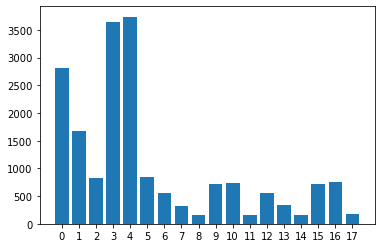

In [71]:
x = np.arange(18)
plt.bar([str(i) for i in x], classes_num)
plt.show()